# Bajando datos de diferentes fuentes. Ejemplos

## Bajar datos de Bicimad

In [1]:
# Importamos librerias
import requests
import zipfile
import pandas as pd

In [2]:
# Ejemplo rapido de cómo funciona requests
url = "https://media.fabfab.net/images/products/popup/tela-decorativa-tablas-de-madera--16_3714_01.jpg"
r = requests.get(url, allow_redirects=True)

In [3]:
with open("madera.jpg", 'wb') as f:
   f.write(r.content)

In [4]:
# Obtenemos el zip de esta web
# https://opendata.emtmadrid.es/getattachment/037ee8a5-b824-43b1-ac7b-76225c783993/201810_Usage_Bicimad.aspx

filename = 'bicis.zip'
url = 'https://opendata.emtmadrid.es/getattachment/7517a650-ccdf-4ab1-b1b0-a1d13694472e/201906_Usage_Bicimad.aspx'

# Realizamos la peticion HTTP para bajarnos el zip.
r = requests.get(url, allow_redirects=True)

In [5]:
# Guardamos el zip
with open(filename, 'wb') as f:
   f.write(r.content)

In [6]:
# Extraemos lo que hay dentro
with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall(".")

In [7]:
# Leemos los datos
datos_bicis = pd.read_json('201906_Usage_Bicimad.json',  lines=True, encoding ='latin-1')

In [8]:
# Vemos qué pinta tienen
datos_bicis.head()

,_id,user_day_code,idplug_base,user_type,idunplug_base,travel_time,idunplug_station,ageRange,idplug_station,unplug_hourTime,zip_code,track
0,{'$oid': '5cf83b752f3843a016be4e2f'},e4d55deb9ac172a8d8f5f0a32599815bd51b7c8760d67e...,21,1,8,219,90,0,66,{'$date': '2019-06-01T00:00:00.000+0200'},,NaN
1,{'$oid': '5cf83b762f3843a016be4e48'},8a0c4123e924a50a958f51985eb71aea750fb072438035...,19,1,19,359,71,4,136,{'$date': '2019-06-01T00:00:00.000+0200'},28039,NaN
2,{'$oid': '5cf83b762f3843a016be4e4f'},a6a9c1f74a68496000542210abc4fc2eba79e2756ad535...,17,1,7,375,39,4,38,{'$date': '2019-06-01T00:00:00.000+0200'},28013,NaN
3,{'$oid': '5cf83b762f3843a016be4e53'},5706c0bd494acc02279d532821c9666b0e506d4f81c838...,4,1,21,264,66,5,90,{'$date': '2019-06-01T00:00:00.000+0200'},28009,NaN
4,{'$oid': '5cf83b762f3843a016be4e54'},eb1b6d32bd4add5d5ff91af72a38786d61075c090383a5...,3,1,13,367,152,4,166,{'$date': '2019-06-01T00:00:00.000+0200'},28006,NaN


## Importando datos desde la API de INE
A 06/09/2020 SERVICIO NO DISPONIBLE

Tempus3 es una base de datos relacional que utiliza un conjunto de objetos organizados dentro de una jerarquía para almacenar y gestinar la información estadística. Su elemento principal  es la serie temporal, único objeto con datos asociados, en torno a él surgen el resto de elementos. Operaciones y tablas estadísticas serán objetos contenedores de series temporales

In [9]:
# Importamos librerías
import requests
import pandas as pd
import datetime

In [10]:
# Conociendo la API
url_plantilla = 'http://servicios.ine.es/wstempus/js/ES/DATOS_SERIE/{codigo}?nult={num_datos}'

# codigo de la serie de datos a consultar y numero de datos

codigo = 'IPC206449'
num_datos = 15

url = url_plantilla.format(codigo=codigo,
                           num_datos=num_datos)

In [11]:
# realizar la descarga de los datos usando la libreria request, y leyendo el formato json
respuesta = requests.get(url)

print(respuesta._content)
datos = respuesta.json()

print(datos)

b'{"COD":"IPC206449", "Nombre":"Total Nacional. \xc3\x8dndice general. Variaci\xc3\xb3n mensual. ", "FK_Unidad":135, "FK_Escala":1, "Data":[{"Fecha":1598911200000, "FK_TipoDato":1, "FK_Periodo":9, "Anyo":2020, "Valor":0.2, "Secreto":false}\n,{"Fecha":1601503200000, "FK_TipoDato":1, "FK_Periodo":10, "Anyo":2020, "Valor":0.5, "Secreto":false}\n,{"Fecha":1604185200000, "FK_TipoDato":1, "FK_Periodo":11, "Anyo":2020, "Valor":0.2, "Secreto":false}\n,{"Fecha":1606777200000, "FK_TipoDato":1, "FK_Periodo":12, "Anyo":2020, "Valor":0.2, "Secreto":false}\n,{"Fecha":1609455600000, "FK_TipoDato":1, "FK_Periodo":1, "Anyo":2021, "Valor":0.0, "Secreto":false}\n,{"Fecha":1612134000000, "FK_TipoDato":1, "FK_Periodo":2, "Anyo":2021, "Valor":-0.6, "Secreto":false}\n,{"Fecha":1614553200000, "FK_TipoDato":1, "FK_Periodo":3, "Anyo":2021, "Valor":1.0, "Secreto":false}\n,{"Fecha":1617228000000, "FK_TipoDato":1, "FK_Periodo":4, "Anyo":2021, "Valor":1.2, "Secreto":false}\n,{"Fecha":1619820000000, "FK_TipoDato":1,

In [12]:
# obtenemos el nombre de la serie para nombrar la columna en el data frame
nombre = datos['Nombre']

# Creamos una serie con las fechas, y las convertimos a zona horaria española y formateamos

fecha_serie_utc = pd.to_datetime([x['Fecha'] for x in datos['Data']], unit='ms', utc=True)

fecha_serie_madrid = fecha_serie_utc.tz_convert('Europe/Madrid')

fecha_serie = [x.tz_localize(None).date()
               for x in fecha_serie_madrid]


# creamos una lista con los valores de la serie que vienen en el tag 'Valor'

ocupados_serie = [x['Valor']
                  for x in datos['Data']] 

print(type(ocupados_serie))

<class 'list'>


In [13]:
# contruimos un dataframe de pandas con los valores

import pandas as pd

tabla = pd.DataFrame(ocupados_serie,
                     index=fecha_serie,
                     columns=[nombre])

In [14]:
tabla

,Total Nacional. Índice general. Variación mensual.
2020-09-01,0.2
2020-10-01,0.5
2020-11-01,0.2
2020-12-01,0.2
2021-01-01,0.0
2021-02-01,-0.6
2021-03-01,1.0
2021-04-01,1.2
2021-05-01,0.5
2021-06-01,0.5


# Acceso a archivos de la pagina de datos.gob.es
Uno de los mayores catálogos de información pública descargable en España

In [15]:
url = "https://data.renfe.com/dataset/928d911e-00ca-437b-be3f-068fc1f97800/resource/63d285e8-9f52-410b-8412-8a8c26f5ddb3/download/consumo-de-agua-y-materiales.csv"

datos=pd.read_csv(url, encoding='utf8', sep=';')
datos

,Año,Consumo de agua (m3),Aceites/grasas (kg),Pinturas (kg)
0,2019,903240,540511,88537
1,2018,917605,446983,116778
2,2017,923881,452534,96362
3,2016,952455,302202,125304
4,2015,941651,315302,130003
5,2014,1023534,319674,125448
6,2013,905703,308904,96946


In [16]:
datos.columns

Index(['Año', 'Consumo de agua (m3)', 'Aceites/grasas  (kg)', 'Pinturas (kg)'], dtype='object')

<AxesSubplot:xlabel='Año'>

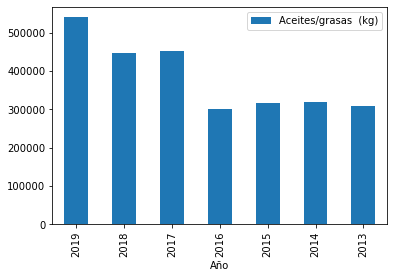

In [17]:
datos.plot.bar("Año", "Aceites/grasas  (kg)")

# OpenStreetMap

In [18]:
import requests
import json
import pandas as pd
overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
[out:json];
node["amenity"="restaurant"]
  (40.420801, -3.694702,40.423754, -3.688167); 
out;
"""
response = requests.get(overpass_url, 
                        params={'data': overpass_query})
print(response)
data = response.json()

<Response [200]>


In [19]:
elements = data['elements']
places = {'lat': [], 'lon': [], 'name': [], 'address': []}
for i in elements:
    try:
        latitude = i['lat']
        longitude = i['lon']
        name = i['tags']['name']
        street = i['tags']['addr:street']
        number = i['tags']['addr:housenumber']
        
        
        places['lat'].append(latitude)
        places['lon'].append(longitude)
        places['name'].append(name)
        places['address'].append(street + ' ' + str(number))
        
    except:
        continue


df = pd.DataFrame(places)
df

,lat,lon,name,address
0,40.423315,-3.692506,Ainhoa,Calle de Doña Bárbara de Braganza 12
1,40.421956,-3.693905,En La Gloria,Calle de Prim 9
2,40.421951,-3.693535,Tampu,Calle de Prim 13
3,40.422266,-3.694097,Casa Gades,Calle del Conde de Xiquena 4
4,40.423345,-3.692632,El Gato Persa,Calle de Doña Bárbara de Braganza 10
5,40.422441,-3.694220,Cannibal Raw Bar,Calle del Almirante 12
6,40.423600,-3.693725,Luke,Calle de Doña Bárbara de Braganza 2
7,40.422141,-3.690864,Taberna Pedraza,Calle de Recoletos 4
8,40.422379,-3.689518,Flavia,Calle de Gil de Santivañes 2
9,40.422777,-3.689781,SQD Meat Point,Calle de Villanueva 2


In [20]:
places = {'lat': [], 'lon': []}
places['lat'].append(1)
places

{'lat': [1], 'lon': []}

## Bajando datos de la calidad del aire

También existe un dataset en Kaggle, pero vamos a ver un ejemplo

In [23]:
import pandas as pd
import requests
import io
import csv

url2 = "http://www.mambiente.munimadrid.es/opendata/horario.txt"

datos=pd.read_csv(url2, header=None)#.content


In [24]:
datos

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,28,79,8,1,38,2,2021,12,21,3.0,...,0,N,0,N,0,N,0,N,0,N
1,28,79,8,6,48,2,2021,12,21,0.3,...,0,N,0,N,0,N,0,N,0,N
2,28,79,8,7,8,2,2021,12,21,2.0,...,0,N,0,N,0,N,0,N,0,N
3,28,79,8,8,8,2,2021,12,21,33.0,...,0,N,0,N,0,N,0,N,0,N
4,28,79,8,9,47,2,2021,12,21,9.0,...,0,N,0,N,0,N,0,N,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,28,79,60,7,8,2,2021,12,21,1.0,...,0,N,0,N,0,N,0,N,0,N
127,28,79,60,8,8,2,2021,12,21,28.0,...,0,N,0,N,0,N,0,N,0,N
128,28,79,60,10,47,2,2021,12,21,10.0,...,0,N,0,N,0,N,0,N,0,N
129,28,79,60,12,8,2,2021,12,21,30.0,...,0,N,0,N,0,N,0,N,0,N
